# BIG MART Sales Prediction - Problem Statement:
Bigmart is a big supermarket chain, with stores all around the country. The management of the shop had set out a challenge to all Data Scientist to help them create a model that can predict the sales per product for each store.

The shop has collected sales data of products across 10 stores in different cities over a given period of time.

Breakdown of the Problem Statement

This is a supervised machine learning problem with target label as : (Item_Outlet_Sales). 

The dataset can be downloaded from : https://www.kaggle.com/devashish0507/big-mart-sales-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
#To clean the data we can combine the two data sets, so that the task become easier.
df_test['Source'] = 'test'
df_train['Source'] = 'train'

df=pd.concat([df_train, df_test], ignore_index=True)

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
df.shape

(14204, 13)

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

# Exploratory Data Analysis

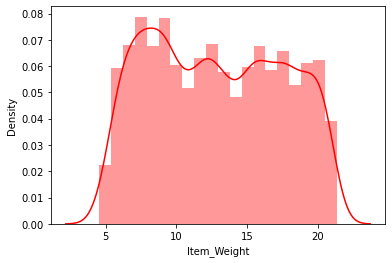

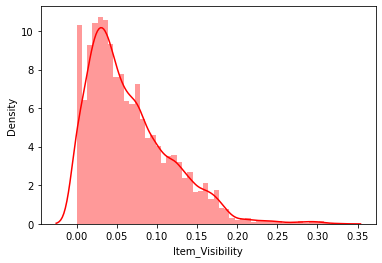

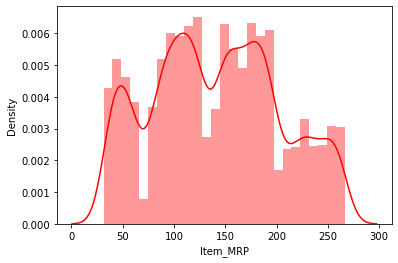

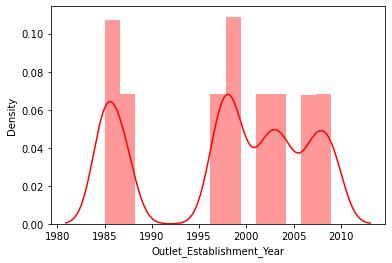

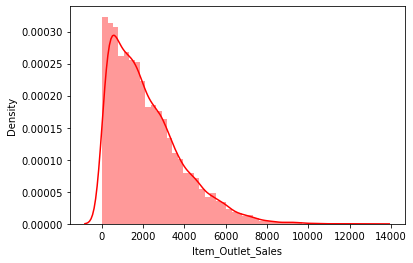

In [14]:
#Checking the distribution of the individual numerical columns

for col in df_train.describe().columns:
    sns.distplot(df_train[col],color='red')
    plt.show()

Points to be taken from this is most of the items are having lesser visibility
and the outlet sales are right skewed, the peak is tends towards the lower values of sales.

In [15]:
#plotting box plots to check the distribution of the feature values. 

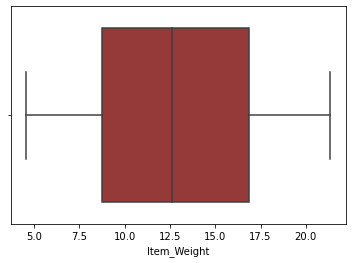

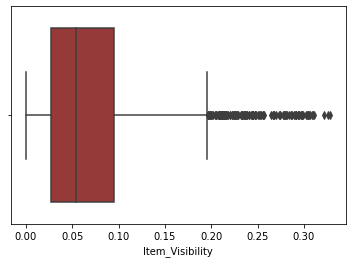

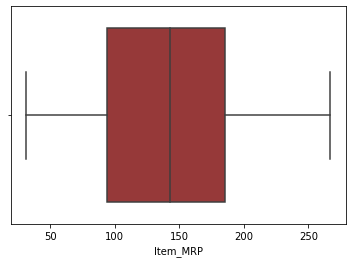

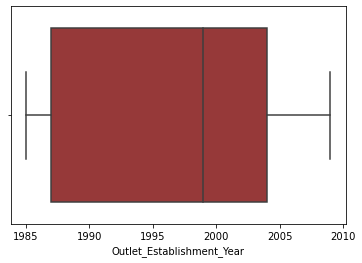

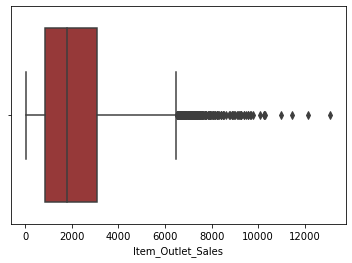

In [16]:
for col in df_train.describe().columns:
    sns.boxplot(df_train[col], color='brown')
    plt.show()

In [17]:
#Similar to the distplot the boxplot also shows the outliers in Outsales and the visibility.

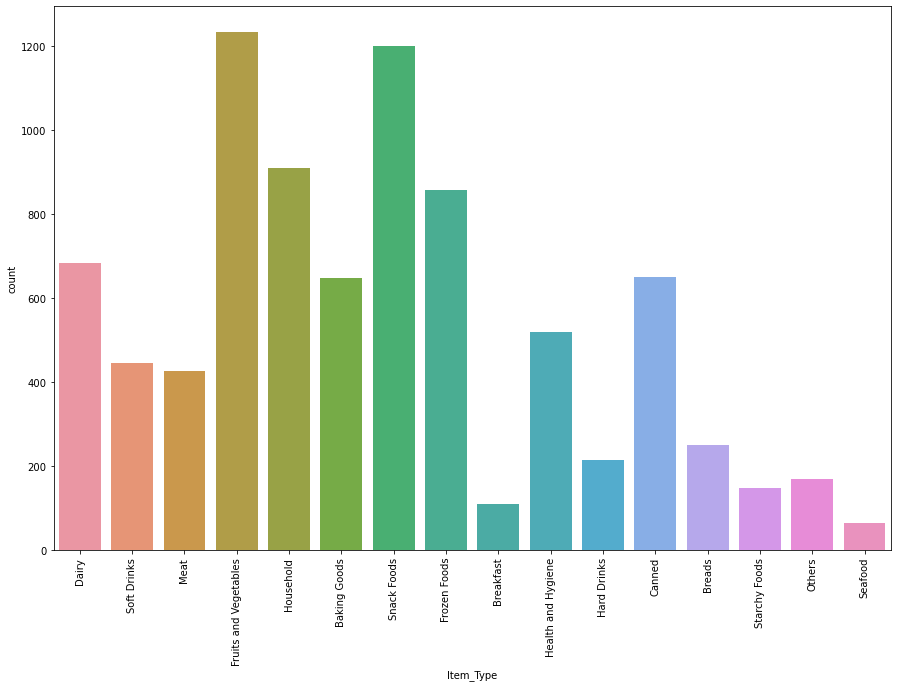

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(df_train['Item_Type'])
plt.xticks(rotation=90)
plt.show()

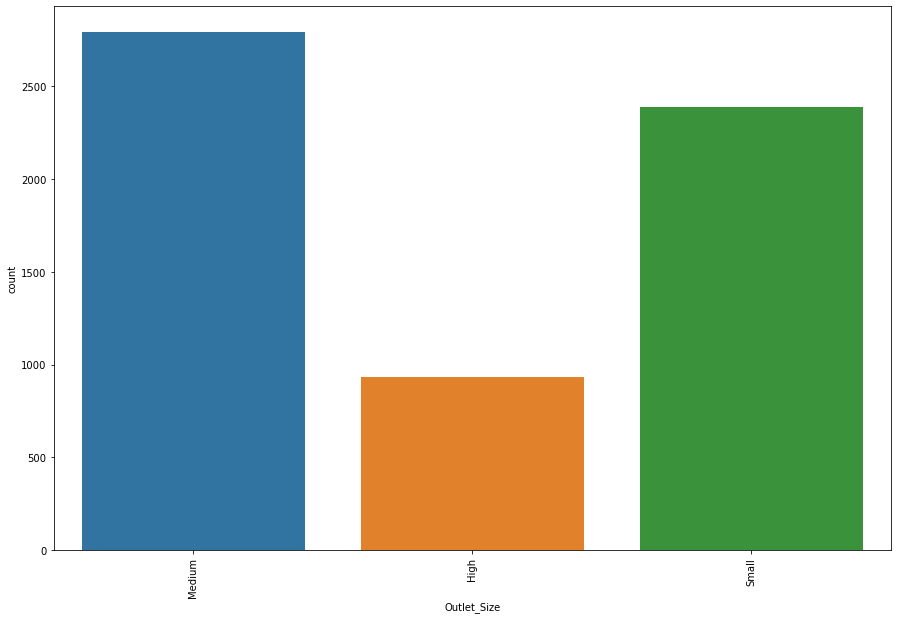

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(df_train['Outlet_Size'])
plt.xticks(rotation=90)
plt.show()

In [20]:
df_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

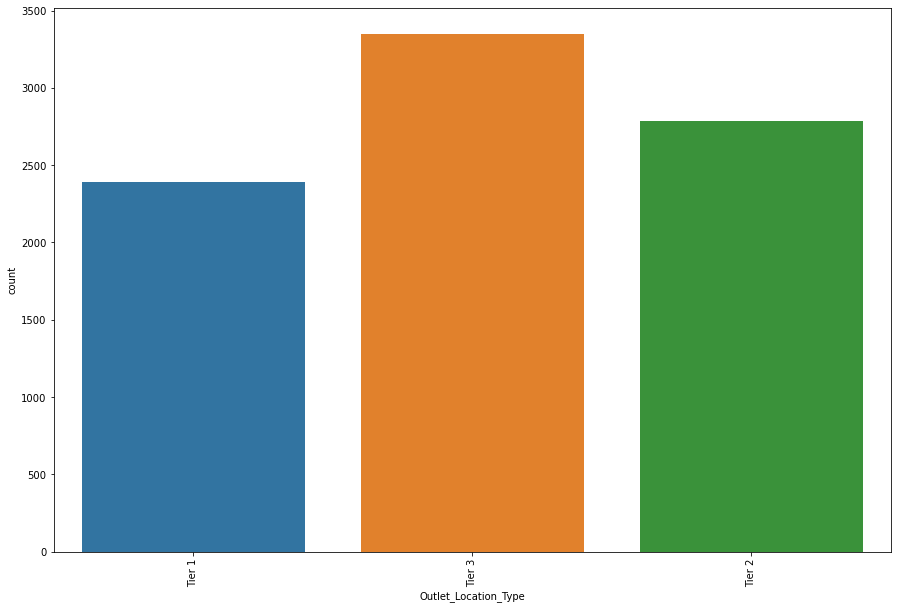

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(df_train['Outlet_Location_Type'])
plt.xticks(rotation=90)
plt.show()

In [22]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [23]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

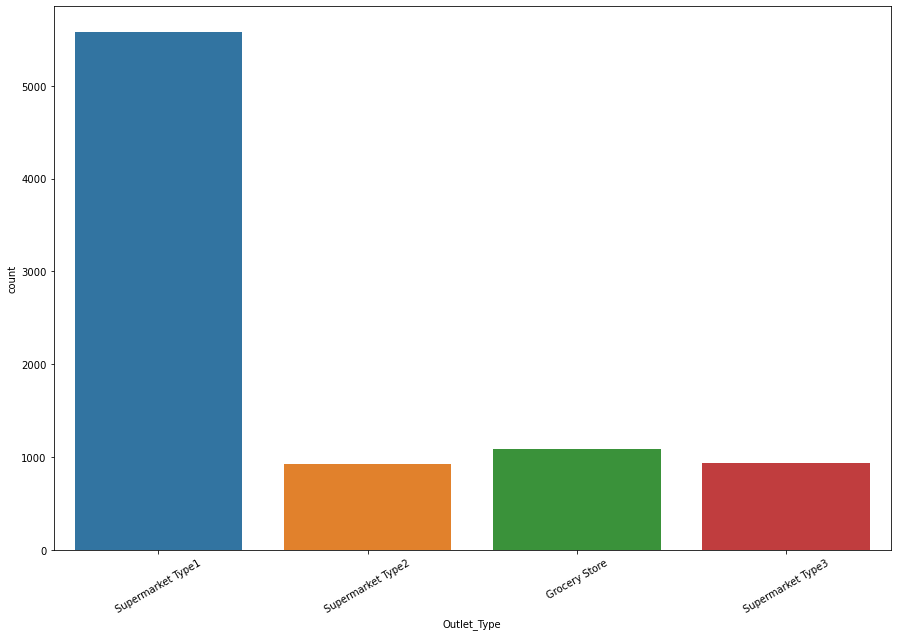

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(df_train['Outlet_Type'])
plt.xticks(rotation=30)
#plt.title('Outlet_Type')
plt.show()

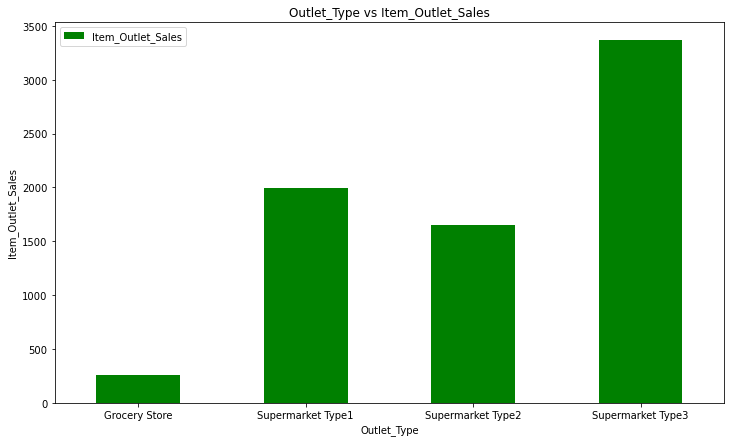

In [25]:
#Creating a pivot table to see the relation between plot outlet_type and item_outlet_sales
Item_Type_pivot = df_train.pivot_table(index='Outlet_Type', 
                values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='Green',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Type vs Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [26]:
#Checking the relation of sales with fat content in the products

In [27]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
#here the fat content category contains duplicates in the forms of short names. 
#So we need to rename the columns to make it unique.

df_train.Item_Fat_Content = df_train.Item_Fat_Content.replace({'LF':'Low Fat','low fat':'Low Fat', 'reg':'Regular'})

In [29]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

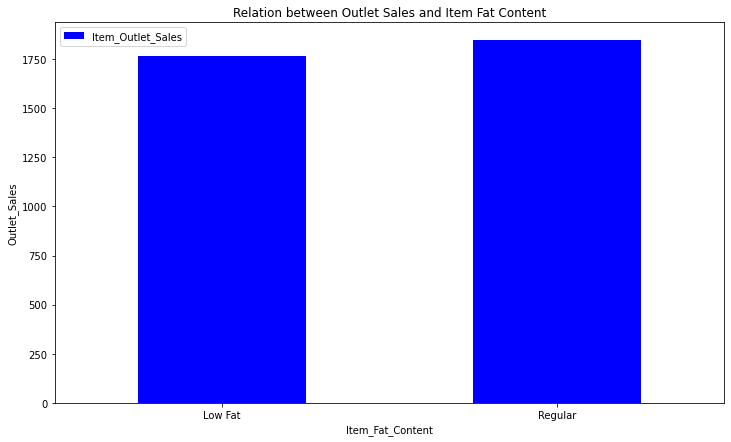

In [30]:
Item_fat_pivot = df_train.pivot_table(index = 'Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)
Item_fat_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Outlet_Sales')
plt.title('Relation between Outlet Sales and Item Fat Content')
plt.xticks(rotation=0)
plt.show()

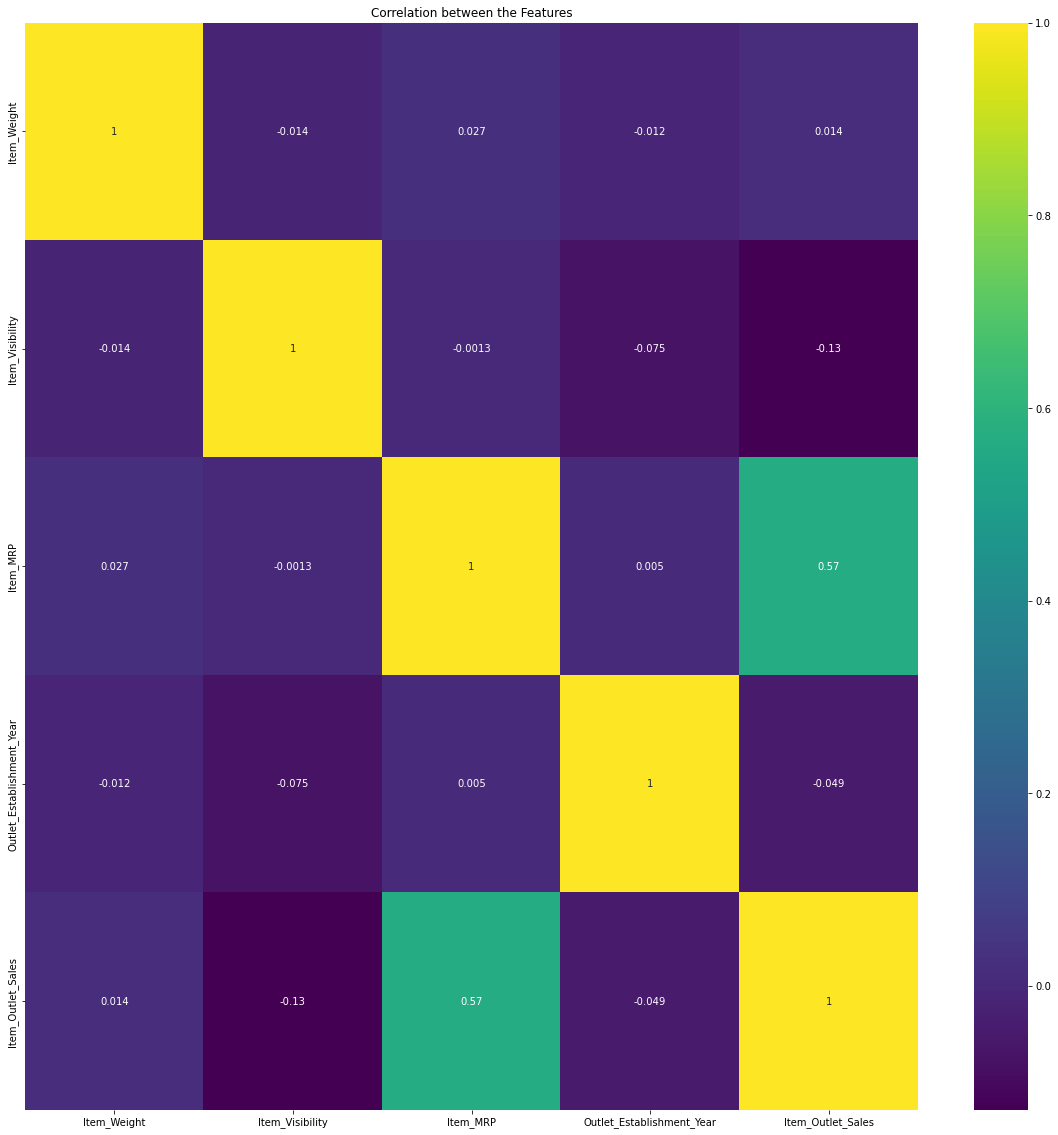

In [31]:
#Creating Heatmap to check the correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), vmax=1, annot=True, cmap='viridis')
plt.title('Correlation between the Features')
plt.show()

# Feature Engineering and Data Selection

In [32]:
#Tranforming the NaN values with the median values in their respective columns.
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [33]:
#We need to transform Item_Weight and Outlet_Size. The Nan values in Item_Outlet_Sales
#is because the test data does not contain the Outlet Sales. Which we need to predict.


In [34]:
df.Item_Weight.fillna(df.Item_Weight.median(), inplace=True)


In [35]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [36]:
df.Outlet_Size.fillna('Medium', inplace=True)

In [37]:
df.Item_Visibility.value_counts()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [38]:
#Since the Item_Visibility contains more number of zero values, this may not reflect
#the true scenario. So we need to replace the zero values with the median. 

In [39]:
df.Item_Visibility  = np.where(df.Item_Visibility==0, df.Item_Visibility.median(), df.Item_Visibility)

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [41]:
#Transforming some of the Columns to make the model building meaningful.
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source'],
      dtype='object')

In [42]:
df.Item_Identifier.value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [43]:
#Transforming the Outlet establishment year into Outlet - age

In [44]:
df['Outlet_Years'] = max(df.Outlet_Establishment_Year)-df.Outlet_Establishment_Year

In [45]:
#A Closer look at the Item_Identifier column shows that items are either
#Food(FD) Or Dring(DR) or Non-Consumables(NC)

In [46]:
df['Item_type_new'] = df.Item_Identifier.apply(lambda x:x[0:2])

In [47]:
df.Item_type_new = df.Item_type_new.replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

In [48]:
df.Item_type_new.value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_type_new, dtype: int64

In [49]:
#If a product is non -consumable then it cannot have the fat content so we need
#transform the values into Not-Edible

In [50]:
df.loc[df.Item_type_new=='Non-Consumable', 'Item_Fat_Content']='Non-Edible'

In [51]:
df.Item_Fat_Content.value_counts()

Low Fat       5998
Regular       4824
Non-Edible    2686
LF             367
reg            195
low fat        134
Name: Item_Fat_Content, dtype: int64

In [52]:
df.Item_Fat_Content = df.Item_Fat_Content.replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [53]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source', 'Outlet_Years',
       'Item_type_new'],
      dtype='object')

In [54]:
#Since the item visibility is a common value for all the stores, we can compute 
# the avg value of the visibility for each product and transform the column to a new one.

In [55]:
Item_visibility_avg = df.pivot_table(index = 'Item_Identifier', values = 'Item_Visibility', aggfunc=np.mean)

In [56]:
Item_visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.046942
DRA24,0.045646
DRA59,0.138786
DRB01,0.086489
DRB13,0.012801
...,...
NCZ30,0.032704
NCZ41,0.063148
NCZ42,0.016417


In [57]:
df_test.Item_Identifier.value_counts()

DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [58]:
function = lambda x: x['Item_Visibility']/Item_visibility_avg['Item_Visibility'][Item_visibility_avg.index == x['Item_Identifier']][0]
df['Item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [59]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,Item_type_new,Item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drink,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.733187
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,1.810406
4,NCD19,8.93,Non-Edible,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,1.944117


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
 13  Outlet_Years               14204 non-null  int

In [61]:
cols = ['Item_Fat_Content','Outlet_Identifier','Outlet_Size',
       'Outlet_Location_Type','Outlet_Type','Item_type_new']

In [62]:
df_cat = pd.get_dummies(df[cols], drop_first=True)

In [63]:
cols_new = ['Item_Identifier', 'Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Source', 'Outlet_Years',
       'Item_visib_avg']

In [64]:
df_new = df[cols_new]

In [65]:
df_final = pd.concat([df_new, df_cat], axis=1)

In [66]:
df_final.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_MRP', 'Item_Outlet_Sales',
       'Source', 'Outlet_Years', 'Item_visib_avg',
       'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_type_new_Food',
       'Item_type_new_Non-Consumable'],
      dtype='object')

# Model Building

In [67]:
#I am going to build 4 regression models and comparing their performance on the test data with the accuracy score. 
#Data Preparation

In [68]:
train_data = df_final[df_final.Source == 'train']
test_data = df_final[df_final.Source == 'test']

In [69]:
train_data.drop('Source', inplace=True, axis=1)
test_data.drop(['Item_Outlet_Sales','Source'], inplace=True, axis=1)

In [70]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Years', 'Item_visib_avg', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_type_new_Food',
       'Item_type_new_Non-Consumable'],
      dtype='object')

In [71]:
X_train = train_data.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y_train = train_data.Item_Outlet_Sales

In [72]:
X_test = test_data.drop(['Item_Identifier'], axis=1)

In [73]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_MRP', 'Outlet_Years',
       'Item_visib_avg', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_type_new_Food',
       'Item_type_new_Non-Consumable'],
      dtype='object')

# Linear Regressor

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [75]:
lr_predict = lr.predict(X_test)
lr_acc = lr.score(X_train, y_train)
print('Linear Regression Accuracy :', lr_acc)

Linear Regression Accuracy : 0.5634657620656471


# DecisionTree Regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor(max_depth=20, min_samples_leaf=100)
dectree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=100)

In [77]:
tree_pred = dectree.predict(X_test)

In [78]:
dectree_acc = dectree.score(X_train, y_train)
print('DecisionTree Regressor Accuracy : ', dectree_acc)

DecisionTree Regressor Accuracy :  0.5780363536329967


# RandomForest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300,max_depth=10,min_samples_leaf=100,n_jobs=-1)

In [80]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [81]:
rf_acc = rf.score(X_train, y_train)
print('RandomForest Regressor Accuracy: ', rf_acc)

RandomForest Regressor Accuracy:  0.5795648919080834


# XGBoost Regressor

In [82]:
#!pip install xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 100, learning_rate=0.05)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [83]:
xgb_pred = xgb.predict(X_test)
xgb_acc = xgb.score(X_train, y_train)
print('XGBoost Regressor Accuracy: ', xgb_acc)

XGBoost Regressor Accuracy:  0.6685918934150743


Conclusion:
    From the four build models, the performance of XGBoost Regressor is better than
    the other three models. 
    One can also try like making train data split into train and test data then
    with the models built from that evaluate the test data.
    Also once can use tune differen hyperparameters and employing cross validation to 
    improve the model performance. 